## The Project
In this project I will attempt to predict the severity of heart disease using the University of California Irvine data set using the K-Nearest-Neighbors dataset. k-NN is easy to understand and implement, making it a good first choice for baseline models on datasets like UCI Heart Disease. K-NN works by memorizing the training dataset and making predictions based on the distance between a new instance and the existing labeled instances. k-NN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying distribution of the data. In the case of the UCI Heart Disease dataset, the data appears to not follow a standard distribution, so k-NN's flexibility would be advantageous. I will also compare the k-NN algirothm vs the more sophisticated Multi-Layer-Perceptron algorithm.

We will predict on the 'target' column which indicates the severity of heart disease

<ol start="0">
  <li>no heart disease</li>
  <li>mild heart disease</li>
  <li>moderate heart disease</li>
  <li>severe heart disease</li>
  <li>critical heart disease</li>
</ol>

## Github repo
https://github.com/JNKHunter/cs5622/tree/main

## The data
The data was provided by the University of California Irvine and is publically available. The data contains informatino about 297 heart disease patients. The target is the 'target' field which is catigorical and denotes the severity of heart disease.

* Bitesize: 18461
* Number of records: 297 (with NA rows dropped)
* Number of columns: 14
* Single table

Citation:
Heart disease. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/45/heart+disease 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from matplotlib import rcParams
from matplotlib.cm import rainbow

%matplotlib inline
warnings.filterwarnings('ignore')

In [82]:
#First we'd like to get the size of the file to make sure we can use it within the constraints of our system
def getSize(fileobject):
    fileobject.seek(0,2)
    size = fileobject.tell()
    return size

file = open('processed.cleveland.data.txt', 'rb')
print(f'File size is:{getSize(file)} bytes')

File size is:18461 bytes


In [83]:
url = "processed.cleveland.data.txt"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Replace '?' with NaN for missing values
df = pd.read_csv(url, names=columns, na_values="?")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [85]:
df.shape

(303, 14)

## Evalutate the data quality

In [86]:
#First we find the number of null values in the dataset
df.isnull().sum().sort_values(ascending=False)

ca          4
thal        2
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [87]:
df.isnull().mean().sort_values(ascending=False) * 100

ca          1.320132
thal        0.660066
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
target      0.000000
dtype: float64

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Cleaning the data
Data imputation will provide minimal to no value becasue the number of Nulls is minimal. As a result I will just drop them. 

In [89]:
df = df.dropna()

## Exploratory data analysis (EDA)

In [90]:
df['age'].describe()

count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

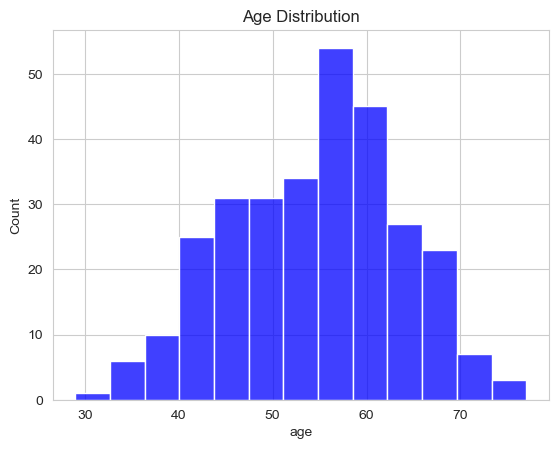

In [91]:
#Intuitively, age seems like an important feature, so let's visualize the age distribution
plt.figure()
sns.histplot(df['age'], color='blue')
plt.title("Age Distribution")
plt.show()

In [92]:
#Visualize the count sex of each patient by age
fig = px.histogram(df, x='age', color='sex')
fig.show()

In [93]:
# The cp column describes the chest pain type [angina, atypical angina, non-anginal, asymptomatic])
df['cp'].value_counts()

cp
4.0    142
3.0     83
2.0     49
1.0     23
Name: count, dtype: int64

In [94]:
# Let's visualize the distribution of ages against the counts of chest pain
fig = px.histogram(df, x='age', color='cp')
fig.show()

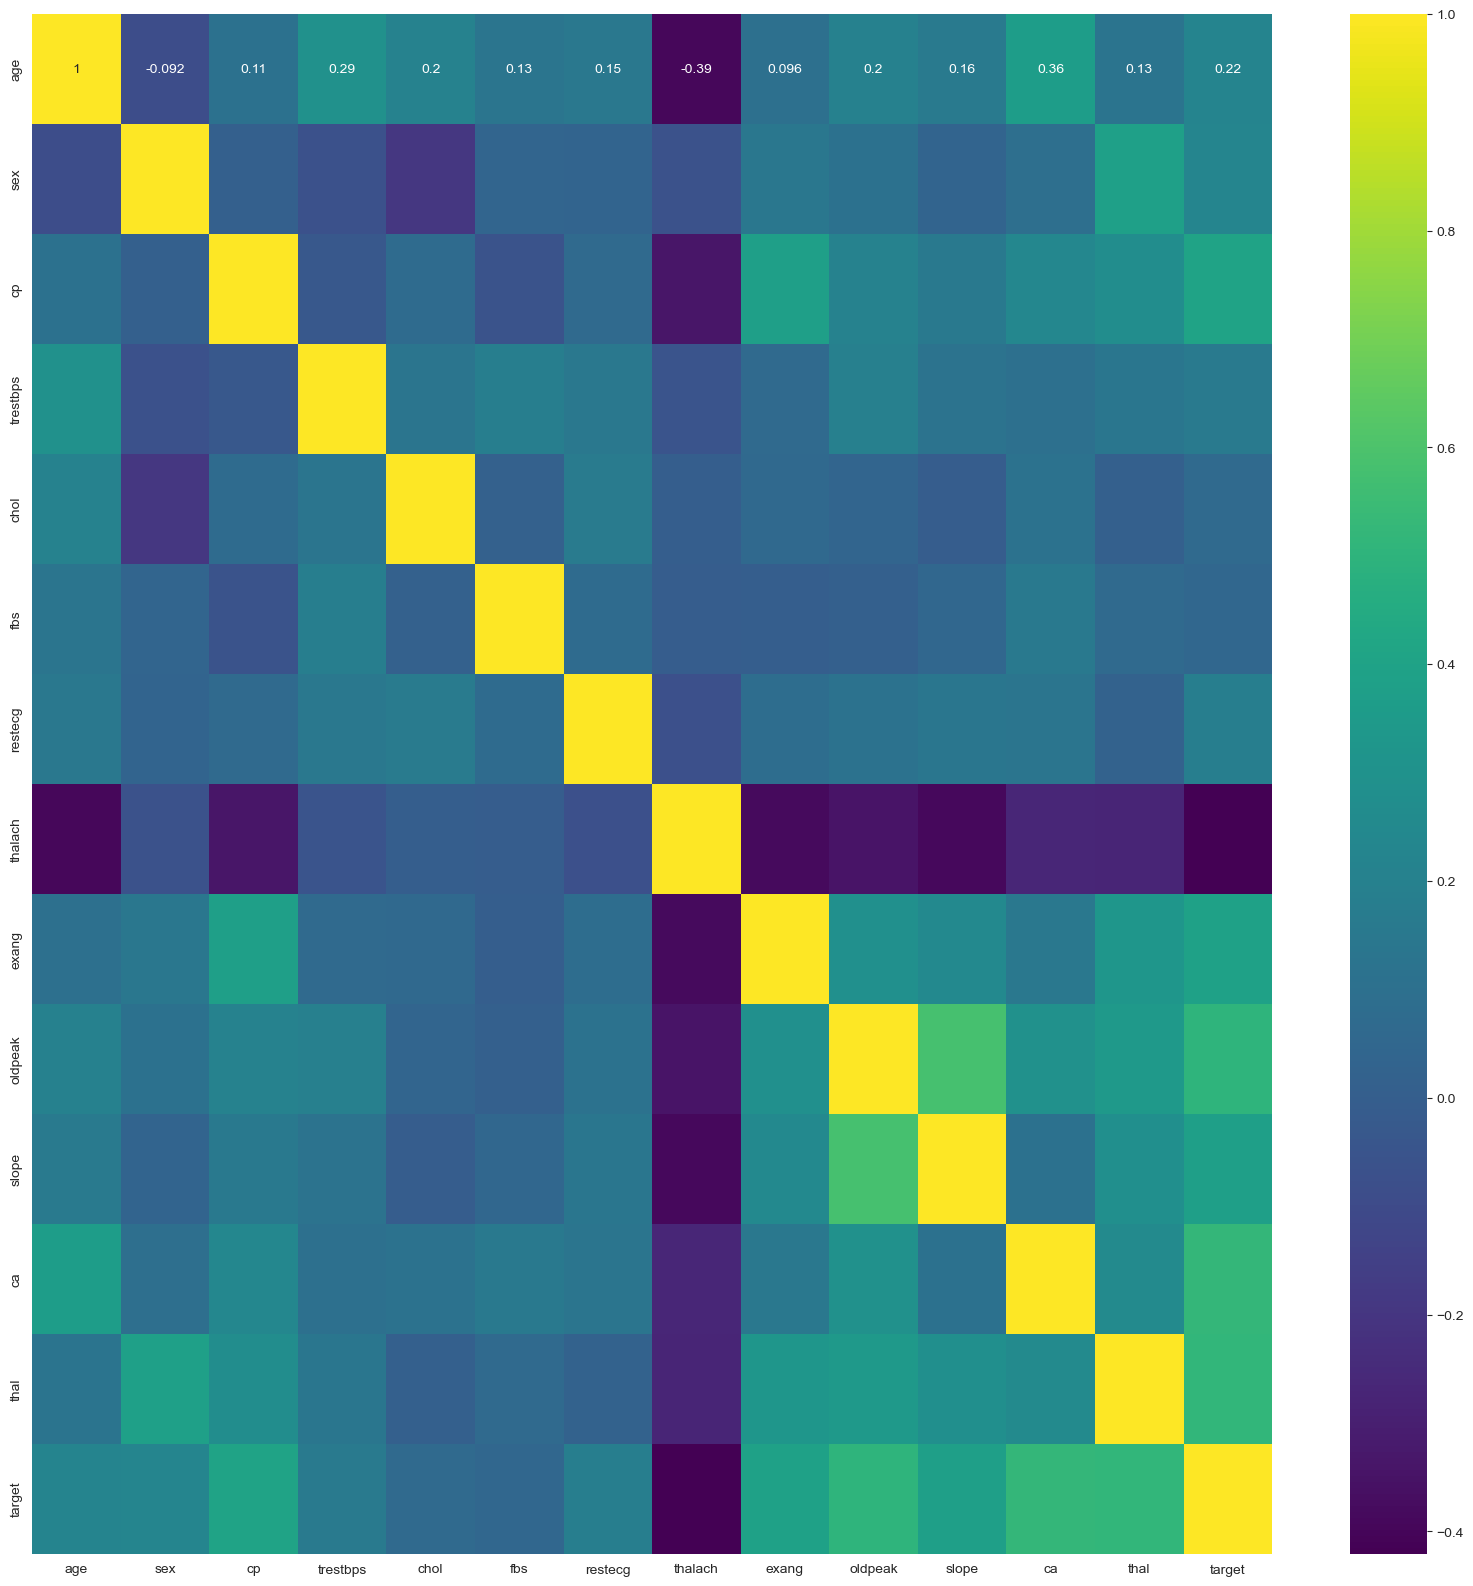

In [95]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap=sns.color_palette("viridis", as_cmap=True))

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

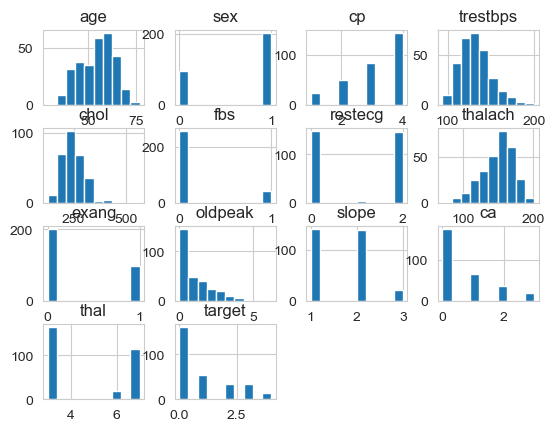

In [96]:
df.hist()

<Axes: xlabel='target', ylabel='count'>

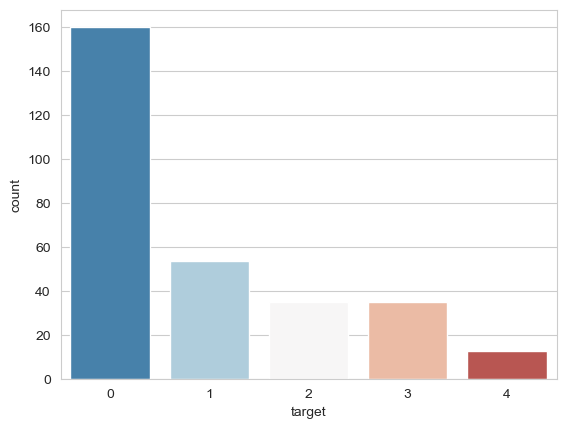

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

## Feature engineering
Here I am scaling the features to improve the model's performance, and also splitting the test and training data  and finnaly tuning the K hyperparameter. For tuning the K hyperparameter we test K values of 1 to 30 using 5-fold cross validation. Each iteration, the model is trained on 4 parts and tested on the remaining 1 part. The mean accuracy is stored for each value of k. We then visualize the results to identify the best k

In [103]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Initially test the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict the target on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6
Confusion Matrix:
[[35  1  0  0  0]
 [ 5  1  2  1  0]
 [ 3  2  0  0  0]
 [ 2  2  3  0  0]
 [ 1  1  1  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        36
           1       0.14      0.11      0.12         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.18      0.22      0.20        60
weighted avg       0.48      0.60      0.53        60



## Hyperperameter tuning

The optimal number of neighbors is 23


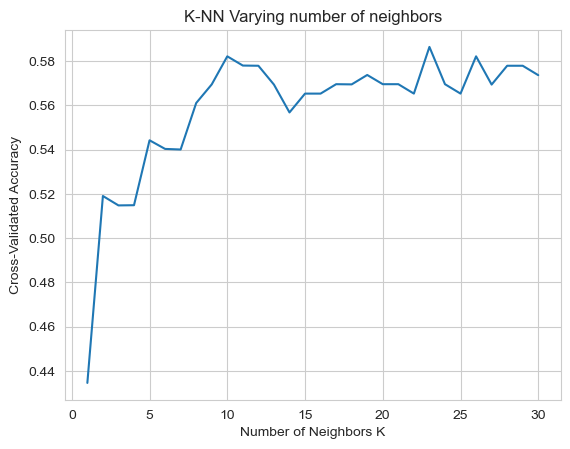

In [100]:
#Now that we tested k=5 resulting in an accuracy of 0.6, let's try to find an the optimal K hyperparameter
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Range of k values to try
k_range = range(1, 31)

# List to store cross-validation scores for each k
cv_scores = []

# Perform 5-fold cross-validation for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Using accuracy as the evaluation metric
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k value (highest cross-validation score)
optimal_k = k_range[cv_scores.index(max(cv_scores))]

print(f"The optimal number of neighbors is {optimal_k}")

# Plot the cross-validation scores as a function of k
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-NN Varying number of neighbors')
plt.show()

In [101]:
# We now have the optimal value for the k hyperperameter. Train the final model with the optimal k of 23
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Evaluate the final model
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy of the model with k={optimal_k}: {accuracy_optimal}")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_optimal))


Accuracy of the model with k=23: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        36
           1       0.22      0.22      0.22         9
           2       0.25      0.20      0.22         5
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         3

    accuracy                           0.67        60
   macro avg       0.45      0.31      0.31        60
weighted avg       0.64      0.67      0.61        60



In [102]:
# Try a Multi-layer percetpron model (not covered in class)
# Initialize and train the MLPClassifier which is a type of neural network
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = mlp.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
accuracy, class_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.20      0.22      0.21         9
           2       0.17      0.20      0.18         5
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.29      0.30      0.29        60
weighted avg       0.60      0.62      0.61        60



## Results and analysis and takeaways
1. With K-NN, we can resonably predict the severity of heart disease with this small dataset.
2. I learned that k-NN with a tuned K hyperperameter outperforms the multi-layer perceptron on the heart disease dataset in terms of accuracy however recall, and overall classification performance is mixed.  If the dataset were larger with more instances, I'd expect the perceptron model to outperform the k-NN model.
3. If we tuned the hyperparameters of the perceptron, we can most likely get a better result, and is something that can be improved.